## Predicting with VGG 16

    First things we'll do is load up a VGG16 Keras model and simply find a random picture and pass it through. Then look at the output

In [1]:
import keras 
import matplotlib.pyplot as plt

/home/ubuntu/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.
/home/ubuntu/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/matplotlib/__init__.py:1067: UserWarning: Duplicate key in file "/home/ubuntu/.config/matplotlib/matplotlibrc", line #2
  (fname, cnt))
/home/ubuntu/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/matplotlib/__init__.py:1067: UserWarning: Duplicate key in file "/home/ubuntu/.config/matplotlib/matplotlibrc", line #3
  (fname, cnt))


In [14]:
## so load it up
model = keras.applications.vgg16.VGG16(include_top=True, weights='imagenet', input_tensor=None, input_shape=None, pooling=None, classes=1000)

In [2]:
import cv2

In [3]:
img = cv2.imread('man_jumping.jpg')

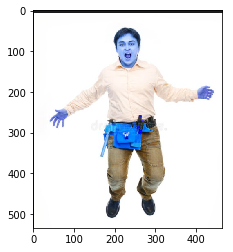

In [4]:
imgplot = plt.imshow(img)

In [15]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

In [16]:
resized_image = cv2.resize(img, (224, 224)) 
resized_image.shape

(224, 224, 3)

In [19]:
resized_image = resized_image.reshape((1, 224, 224, 3))
resized_image.shape

(1, 224, 224, 3)

In [21]:
prediction = model.predict(resized_image)

In [74]:
prediction.argmax()
index = prediction.argsort()
index = index[0]
index[-1:-6:-1]

array([608, 416, 843, 615, 529])

In [72]:
import numpy  as np
x = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
x[-1:-3:-1]

array([9, 8])

In [78]:
prediction[0,index[-1:-6:-1]]

array([0.7085622 , 0.0604288 , 0.05173158, 0.04891663, 0.02682121],
      dtype=float32)

In [79]:
img = cv2.imread('../apple-food-fruit-39803.jpg')
resized_image = cv2.resize(img, (224, 224)) 
resized_image = resized_image.reshape((1, 224, 224, 3))
resized_image.shape

(1, 224, 224, 3)

In [81]:
prediction = model.predict(resized_image)
prediction.argmax()
index = prediction.argsort()
index = index[0]
index[-1:-6:-1]
prediction[0,index[-1:-6:-1]]

array([0.5362656 , 0.08890367, 0.06645071, 0.05861576, 0.04573039],
      dtype=float32)